## Walmart Sales Prediction

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [3]:
df.shape

(180, 4)

In [4]:
df['Year'].unique()

array([2009, 2010, 2011, 2012, 2013], dtype=int64)

In [5]:
df['ProductCategory'].unique()

array(['WomenClothing', 'MenClothing', 'OtherClothing'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       180 non-null    int64  
 1   Month                      180 non-null    int64  
 2   ProductCategory            180 non-null    object 
 3   Sales(In ThousandDollars)  170 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.8+ KB


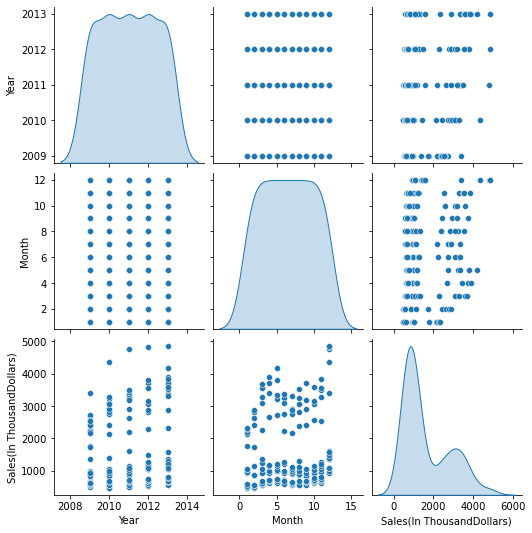

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [8]:
df1=pd.get_dummies(df, columns= ['ProductCategory'], drop_first = True)
df1.head()

,Year,Month,Sales(In ThousandDollars),ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,2009,1,1755.0,0,1
1,2009,1,524.0,0,0
2,2009,1,936.0,1,0
3,2009,2,1729.0,0,1
4,2009,2,496.0,0,0


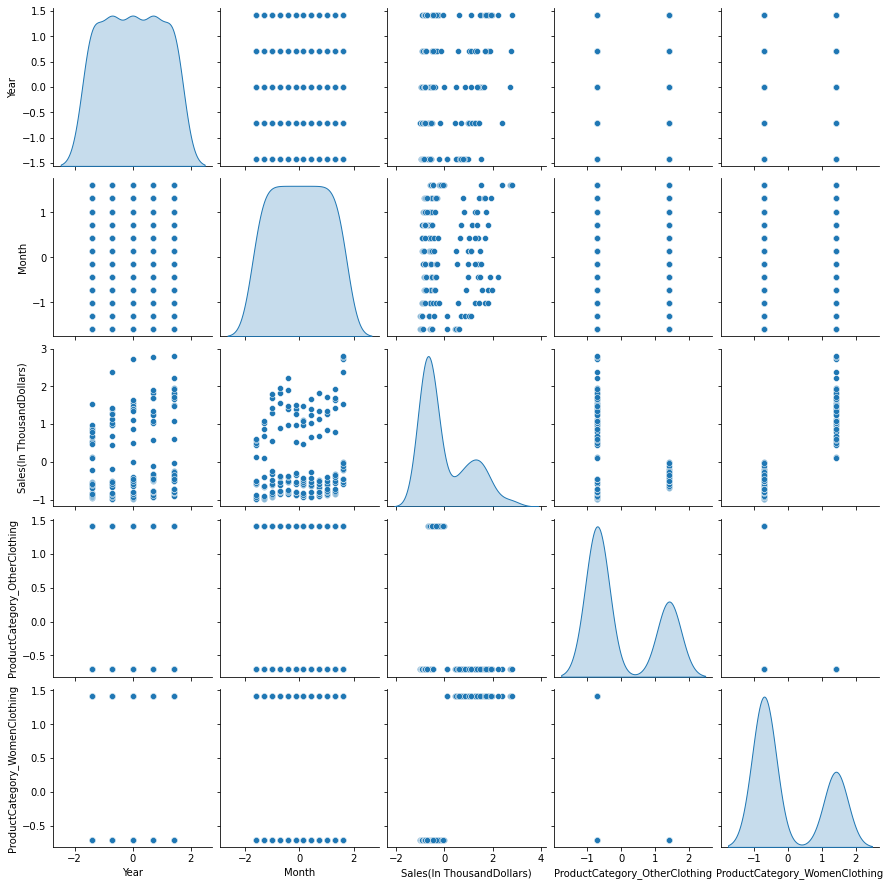

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaleddemo = pd.DataFrame(sc.fit_transform(df1))
scaleddemo.columns = df1.columns
sns.pairplot(scaleddemo,diag_kind='kde')

In [10]:
# import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate the encoder
labelencoder = LabelEncoder()

# fit the encoder on 'Outlet_Size' 
df1['Label_Encoded_Year'] = labelencoder.fit_transform(df1.Year)

# display first 5 observations
df1.head()

,Year,Month,Sales(In ThousandDollars),ProductCategory_OtherClothing,ProductCategory_WomenClothing,Label_Encoded_Year
0,2009,1,1755.0,0,1,0
1,2009,1,524.0,0,0,0
2,2009,1,936.0,1,0,0
3,2009,2,1729.0,0,1,0
4,2009,2,496.0,0,0,0


In [11]:
df1.drop(df1[['Year']],axis=1,inplace=True)

In [12]:
df1['Label_Encoded_Year'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [13]:
df1.isnull().sum()/len(df1)

Month                            0.000000
Sales(In ThousandDollars)        0.055556
ProductCategory_OtherClothing    0.000000
ProductCategory_WomenClothing    0.000000
Label_Encoded_Year               0.000000
dtype: float64

In [14]:
df1 = df1.dropna()

In [15]:
#Basic Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

X=df1.drop('Sales(In ThousandDollars)',axis=1)
#X=demo[['cement','age','water']]
y=df1[['Sales(In ThousandDollars)']]
X_train, y_train = train_test_split(X, y, test_size= .30, random_state=10)
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
y_train_pred=lr.predict(Xtrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
rmse_train=mean_squared_error(ytrain,y_train_pred,squared=False)
print('RMSE: ',rmse_train,3)

Training R2
0.9217528339238354
RMSE:  325.672252108628 3


In [ ]:
X_train,y_train=df.drop(columns=['Sales(In ThousandDollars)']),df['Sales(In ThousandDollars)']

In [16]:
X_test=pd.read_csv('submission.csv')
X_test.head()

,Year,Month,ProductCategory,Unnamed: 3,Sales(In ThousandDollars)
0,2014,1,WomenClothing,NaN,NaN
1,2014,1,MenClothing,NaN,NaN
2,2014,1,OtherClothing,NaN,NaN
3,2014,2,WomenClothing,NaN,NaN
4,2014,2,MenClothing,NaN,NaN


In [17]:
X_test.drop(columns=['Unnamed: 3','Sales(In ThousandDollars)'],inplace=True)

In [18]:
# Cat columns
X_cat=df.select_dtypes(include='object').columns

In [20]:
# Cat columns
X_cat=df.select_dtypes(include='object').columns

X_test.head(5)

,Year,Month,ProductCategory
0,2014,1,WomenClothing
1,2014,1,MenClothing
2,2014,1,OtherClothing
3,2014,2,WomenClothing
4,2014,2,MenClothing


In [22]:
oe=LabelEncoder()

X_test['Year']=X_test['Year'].map(lambda x: 5 if x==2014 else 0)
X_test['ProductCategory']=oe.fit_transform(X_test['ProductCategory'])

In [33]:
Xtrain.head()

,Month,ProductCategory_OtherClothing,ProductCategory_WomenClothing,Label_Encoded_Year
101,10,1,0,2
63,10,0,1,1
104,11,1,0,2
92,7,1,0,2
147,2,0,1,4


In [28]:
X_test.head()

,Year,Month,ProductCategory
0,5,1,2
1,5,1,0
2,5,1,1
3,5,2,2
4,5,2,0


In [34]:
from sklearn.linear_model import SGDRegressor

In [35]:
from sklearn.linear_model import SGDRegressor

In [36]:
sgd_model=SGDRegressor()
sgd_model.fit(Xtrain,ytrain)

SGDRegressor()

In [37]:
y_pred=sgd_model.predict(X_test)
y_pred

ValueError: X has 3 features, but SGDRegressor is expecting 4 features as input.

In [ ]:
X_test.reset_index()
X_test.head()

In [ ]:
X_test['Sales(In ThousandDollars)']=y_pred

In [ ]:
X_test.reset_index()

In [ ]:
X_test2 = X_test.drop(columns=['Year','Month','ProductCategory']).reset_index().rename({'index':'Year'},axis=1)

In [ ]:
X_test2.to_csv('mySubmission.csv',index=False)

In [ ]:
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import GridSearchCV
tuned=[{'alpha':[0.001,0.02,0.003,0.004,0.005],'l1_ratio':[0.001,0.02,0.003,0.004,0.005,0.006,0.007,0.008]}]

sgd=SGDRegressor()
grid_model=GridSearchCV(estimator=sgd,param_grid=tuned)
grid_model.fit(X_train,y_train)

y_pred=grid_model.predict(X_test)

sgd_model=SGDRegressor()
sgd_model.fit(X_train,y_train)

y_pred=sgd_model.predict(X_test)
y_pred

X_test['Sales(In ThousandDollars)']=y_pred

X_test.reset_index()

X_test2 = X_test.drop(columns=['Year','Month','ProductCategory']).reset_index().rename({'index':'Year'},axis=1)

X_test2.to_csv('mySubmission.csv',index=False)